In [1]:
import json
import matplotlib.pylab as plt

with open('hamiltonian_data.json','r') as f:
    l = json.load(f)

In [2]:
import numpy as np

I = np.eye(4)
#plt.matshow(I)

Z0 = np.diag([1,1,-1,-1])
#plt.matshow(Z0)

Z1 = np.diag([1,-1,1,-1])
#plt.matshow(Z1)

Z0Z1 = np.diag([1,-1,-1,1])
#plt.matshow(Z0Z1)

X0X1 = np.fliplr(np.eye(4))
#plt.matshow(X0X1)

Y0Y1 = np.fliplr(np.diag([-1, 1, 1, -1]))
#plt.matshow(Y0Y1)

In [3]:
vals = []
vals_apx = []
Rs = []

nBits = 5
E_min = -2
E_max = +2

shift = 2

dt = (2*np.pi) / float(E_max - E_min)
#dt = 1. / float(E_max - E_min)

K = 1

for coeffs in l:
    H = coeffs['I_coeff'] * I
    H += coeffs['Z0_coeff'] * Z0
    H += coeffs['Z1_coeff'] * Z1
    H += coeffs['Z0Z1_coeff'] * Z0Z1
    H += coeffs['X0X1_coeff'] * X0X1
    H += coeffs['Y0Y1_coeff'] * Y0Y1
    H += shift * I
    w, v = np.linalg.eigh(H)
    
    E = w[0]

#   phi = (dt * E) % 1
    phi = ((dt * E) / (2* np.pi)) % 1

    
    K = (dt*E)/(2*np.pi) - phi
    
    
    phi_apx = np.floor(2 ** nBits * phi) / 2 **nBits
         
    print(K,phi, phi_apx, np.binary_repr(int(np.floor(2**nBits * phi)), width=nBits))

    
    E_apx = (2*np.pi/dt)*(phi_apx + K)
    
    vals_apx.append(E_apx)
    vals.append(E)
    Rs.append(coeffs['R'])
    #plt.matshow(H)

0.0 0.5360525829777477 0.53125 10001
0.0 0.41901518867877086 0.40625 01101
0.0 0.3467563638475299 0.34375 01011
0.0 0.2998724346277622 0.28125 01001
0.0 0.2686850987382789 0.25 01000
0.0 0.24774774578185166 0.21875 00111
0.0 0.23365205474364006 0.21875 00111
0.0 0.22441845174814606 0.21875 00111
0.0 0.21860143440991636 0.1875 00110
0.0 0.21526381393373123 0.1875 00110
0.0 0.2137599313978454 0.1875 00110
0.0 0.21360021896908896 0.1875 00110
0.0 0.21433047944069994 0.1875 00110
0.0 0.21584331458575895 0.1875 00110
0.0 0.21786084373675196 0.1875 00110
0.0 0.2201755797172341 0.21875 00111
0.0 0.222770817995386 0.21875 00111
0.0 0.22549500102973113 0.21875 00111
0.0 0.2282912147771025 0.21875 00111
0.0 0.2311569671586668 0.21875 00111
0.0 0.23394021612507987 0.21875 00111
0.0 0.236639295033238 0.21875 00111
0.0 0.23925098069828715 0.21875 00111
0.0 0.241767560805262 0.21875 00111
0.0 0.24410499879058264 0.21875 00111
0.0 0.24629423068652492 0.21875 00111
0.0 0.24833630543502092 0.21875 0011

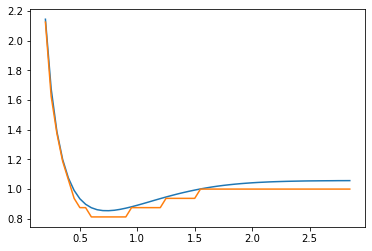

In [12]:
plt.plot(Rs, vals)
plt.plot(Rs, vals_apx)

In [6]:
from scipy import linalg
U = linalg.expm(-1j * dt * H)
print(U)
print(type(U))

[[0.95775727-0.28757784j 0.        +0.j         0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.51037096+0.73476979j 0.37963778-0.23560561j
  0.        +0.j        ]
 [0.        +0.j         0.37963778-0.23560561j 0.43186959+0.78348824j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.        +0.j
  0.97349514+0.22870769j]]
<class 'numpy.ndarray'>
